In [660]:
from datetime import datetime
print(f'Päivitetty {datetime.now().strftime("%d.%m.%Y")} / Tatu Erkinjuntti')

Päivitetty 18.10.2024 / Tatu Erkinjuntti


Oppillaan kommentti: Itse en pidä yhdysvaltaistyylisestä päiväyksen formatoinnista kun ohjelma suoritetaan/luetaan tilanteessa jossa lukija on tottunut "perinteiseen" formatointiin => "day"."month"."year", kuten Suomessa yleisesti käytössä. Tästä syystä datetime formatointi on päivitetty tehtävässäni.

# Tehtävä 1.

## Kuvaus

Tehtävässä 1 on tarkoituksena soveltaa kuvailevan ja selittävän analytiikan menetelmiä valitsemiisi datoihin. Voit käyttää alempana mainittuja data-paketin datoja tai omaan työhön tai kiinnnostuksen kohteisiin liittyviä datoja. Käytä tehtävässä vähintään kahta eri datasettiä ja huolehdi että saat mukaan sekä kategorisia että määrällisiä muuttujia.

## Tehtävän kriteerit

Täysiin pisteisiin (5) pääset soveltamalla kaikkia esimerkkimuistioissa esitettyjä menetelmiä:

 - frekvenssitaulukot [x],
 - luokitellut jakaumat [x],
 - tilastolliset tunnusluvut [x], ristiintaulukoinnit [x],
 - tunnuslukujen vertailut ja korrelaatiot
 - tulosten visualisointeja.




## Tehtävän alustus

Haetaan tarvittavat kirjastos ja määritellään käytetyt data-aineistot. Itse teen tämän aina kerralla ohjelman alussa, näin yhdellä silmäyksellä näkee ohjelman riippuvaisuudet. Jos käytössä olisi pysyviä muuttujia, tulisi ne myös alustaa samalla.  

In [661]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

# Kaavioiden prosenttiakselin muotoiluun
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

sns.set_style('dark')

data_titanic = 'Data/titanic_new.xlsx'
data_kunnat = 'Data/kunnat.xlsx'
data_sales = "Data/sales_data_sample.csv"

## Titanic

Aloitan tehtävän tutkimalla 1912 uponeen matkustajalaivan matkustajia käsitelevää data-pakettia. 

In [662]:
## Luetaan excel-tiedosto
df_titanic = pd.read_excel(data_titanic)
## Tarkastellaan mitä datapaketti sisältää, samalla nähdään rivien ja sarakkeiden lukumäärä.

In [663]:
## Tarkastellaan seuraavaksi käytössä olevia tietotyyppejä.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1310 non-null   int64  
 1   pclass      1310 non-null   int64  
 2   survived    1310 non-null   int64  
 3   name        1310 non-null   object 
 4   sex         1310 non-null   object 
 5   age         1047 non-null   float64
 6   sibsp       1310 non-null   int64  
 7   parch       1310 non-null   int64  
 8   ticket      1310 non-null   object 
 9   fare        1309 non-null   float64
 10  cabin       296 non-null    object 
 11  embarked    1308 non-null   object 
 12  boat        487 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   746 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.6+ KB


Aloitetaan tutkimalla yleisiä tilastollisia tunnuslukuja suhteessa matkustajamäärää, näitä on sukupuoli ja ikä jakauma

In [664]:
# Otetaan yleinen kuva data-aineistosta
df_titanic.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body
count,1310.000000,1310.000000,1310.000000,1047.000000,1310.000000,1310.000000,1309.000000,121.000000
mean,654.500000,2.293893,0.382443,29.881248,0.498473,0.384733,33.290326,160.809917
std,378.308736,0.838280,0.486169,14.406609,1.041352,0.865295,51.739215,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,327.250000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,654.500000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,981.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Matkustajien iästä saadaan jo hyvin paljon tietoa tässä vaiheessa. Iän keskiarvo on hieman alle 30 vuotta, vanhin matkustaja on iältään 80 ja nuorin on vauvaikäinen.

In [665]:
# Aloitetaan tutkimalla sukupuolijakaumaa, muutetaan ensiksi taulukosta muutaman sarakkeen nimi kuvaavammaksi Suomenkielellä-
df_titanic = df_titanic.rename(columns={'sex':'sukupuoli','pclass':'matkustajaluokka'})
df_titanic.head() # Tarkastetaan vain ensimmäiset rivit

,Unnamed: 0,matkustajaluokka,survived,name,sukupuoli,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Haghish, E. F.",male,30.0000,0,0,24058,26.5500,A1 Special,S,1,NaN,"Odense, Denmark"
1,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [666]:
# Tarkastetaan ensiksi sukupuolijakauma.
# Frekvenssi-sarakkeen otsikkona käytetään yleisesti f-kirjainta.
df_titanic_gender = pd.crosstab(df_titanic['sukupuoli'], columns='f')
# Poistetaan 'Col_0' otsikko ensimmäisestä sarakkeesta.
df_titanic_gender.columns.name=''
# Suomennetaan sukupuolet
gender = ['Nainen', 'Mies']
df_titanic_gender.index = gender
# Lisätään mukaan prosentti-sarake jotta määrällinen ero on selkeämpi.
n = df_titanic_gender['f'].sum()
df_titanic_gender['%'] = df_titanic_gender['f']/n*100
# Lisätään vielä rivi jossa näytetään yhteenlaskettu määrä.
df_titanic_gender.loc['Yhteensä'] = df_titanic_gender.loc['Nainen':'Mies'].sum()
# Hieman siistitään ulkoasua, f-sareke ei tarvitse erikseen desimaalia ja % sarake voisi olla kahden desimaalin tarkkuudella..
df_titanic_gender.style.format({'f':'{:.0f}', '%':'{:.1f} %'})

,f,%
Nainen,466,35.6 %
Mies,844,64.4 %
Yhteensä,1310,100.0 %


Jakauma sukupuolten välillä nyt selkeä mutta tehdään tästä vielä helppolukuinen pylväs diagrammi.

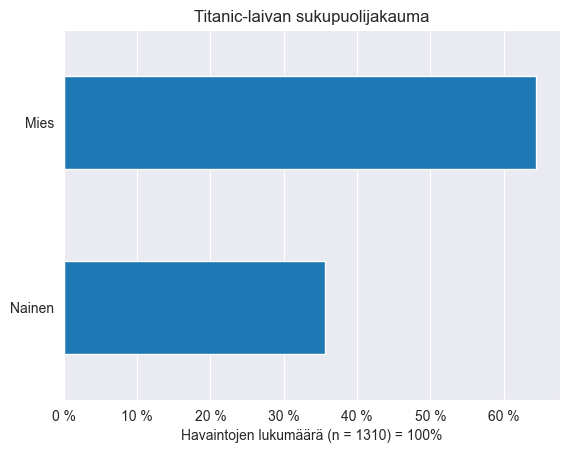

In [667]:
# luodaan pylväsdiagrammin sukupuolten prosenttisuhteista.
df_titanic_gender.drop('Yhteensä')['%'].plot(kind='barh', title='Titanic-laivan sukupuolijakauma', xlabel=(f'Havaintojen lukumäärä (n = {n}) = 100%'), ylabel='')
# määritetään myös x-akselilta lähtevä taustaviivoitus.
plt.grid(axis='x')
# määritellään vielä x-akselin lukuihin prosentit.
plt.gca().xaxis.set_major_formatter(ticks)

Tutkitaan seuraavaksi ikä matkustajien ikä jakaumaa. 

In [668]:
#Suomennetaan taas yksi sarake taulukosta
df_titanic = df_titanic.rename(columns={'age':'ikä'})

# Jaetaan itä johdonmukaisiin ryhmiin, näin on lapsi, nuori, aikuinen ja vanhus. Viitettä tähän ikäjakaukumaan haettiin Wikipediasta
# lapsi = 0-13 vuotta
# nuori = 13-22 vuotta
# aikuinen = 22 - 60 vuotta
# vanhus = 60 - 100 vuotta
age_groups = [0,13,22,60,100]

# Lisätään taulukkoon ikäluokka-sarake
df_titanic['ikäluokka'] = pd.cut(df_titanic['ikä'], bins=age_groups, right=False)

#Tarkastetaan muutokset
df_titanic.head()

,Unnamed: 0,matkustajaluokka,survived,name,sukupuoli,ikä,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ikäluokka
0,0,1,1,"Haghish, E. F.",male,30.0000,0,0,24058,26.5500,A1 Special,S,1,NaN,"Odense, Denmark","[22, 60)"
1,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[22, 60)"
2,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0, 13)"
3,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0, 13)"
4,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[22, 60)"


Tarkastellaan vielä vielä ikäluokkien frekvenssit.

In [669]:
# Tarkastetaan ensiksi sukupuolijakauma.
# Frekvenssi-sarakkeen otsikkona käytetään yleisesti f-kirjainta.
df_titanic_age = pd.crosstab(df_titanic['ikäluokka'], columns='f')
# Poistetaan 'Col_0' otsikko ensimmäisestä sarakkeesta.
df_titanic_age.columns.name=''
# Suomennetaan sukupuolet
df_titanic_age.index = ['Lapsi', 'Nuori', 'Aikuinen', 'Vanhus']
# Lisätään mukaan prosentti-sarake jotta määrällinen ero on selkeämpi.
n = df_titanic_age['f'].sum()
df_titanic_age['%'] = df_titanic_age['f']/n*100
# Lisätään vielä rivi jossa näytetään yhteenlaskettu määrä.
df_titanic_age.loc['Yhteensä'] = df_titanic_age.loc['Lapsi':'Vanhus'].sum()
# Hieman siistitään ulkoasua, f-sareke ei tarvitse erikseen desimaalia ja % sarake voisi olla kahden desimaalin tarkkuudella..
df_titanic_age.style.format({'f':'{:.0f}', '%':'{:.1f} %'})

,f,%
Lapsi,94,9.0 %
Nuori,196,18.7 %
Aikuinen,717,68.5 %
Vanhus,40,3.8 %
Yhteensä,1047,100.0 %


Aikuiset ovat listalla selkeästi yliedustettuja.
Tehdään tehdään ikäluokan jako 10 vuoden välein ja tehdään histogrammi, jotta saadaan paremmin kuvaa otannan ikäsuhteista.  
Tarkastellaan näitä prosentteina, jotta kokonaisuuden hahmottaminen on helpompaa.

In [670]:
# Tyhjennetään lista ja populoidaan se uudestaan tarkemilla raja-arvoilla.
age_groups.clear()
for i in range(0, 110, 10):
    age_groups.append(i)

#Lisätään taulukkoon ikäluokka-sarake
df_titanic['ikäluokka'] = pd.cut(df_titanic['ikä'], bins=age_groups, right=False)

#Tarkastetaan muutokset
df_titanic.head()

,Unnamed: 0,matkustajaluokka,survived,name,sukupuoli,ikä,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ikäluokka
0,0,1,1,"Haghish, E. F.",male,30.0000,0,0,24058,26.5500,A1 Special,S,1,NaN,"Odense, Denmark","[30, 40)"
1,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[20, 30)"
2,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0, 10)"
3,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0, 10)"
4,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[30, 40)"


Text(0, 0.5, '%, n = 1047')

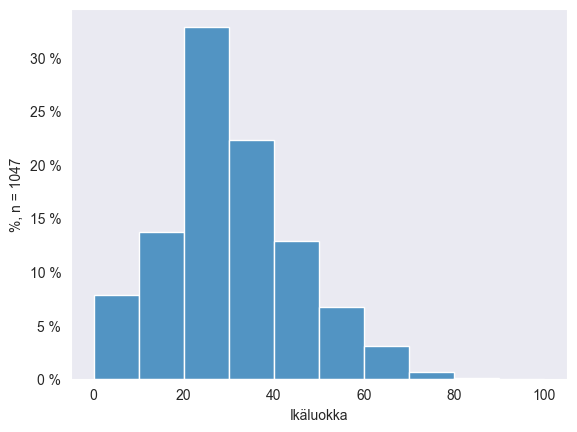

In [671]:
# Määritellään histogrammi käsittelemään prosentteja
sns.histplot(df_titanic['ikä'], bins=age_groups, stat='percent')
# Lisätään Y-akselille prosenttimerkit
plt.gca().yaxis.set_major_formatter(ticks)
# Nimetään X-akseli
plt.xlabel('Ikäluokka')
plt.ylabel(f'%, n = {n}')

Nyt saadaan selkeämpää kuvaa ikäjakaumasta. Tehdään vielä ristiintaulukointi jotta saadaan selville iän ja sukupuolen suhde matkustajissa.

In [672]:
# Tehdään ristiinlasku ikäluokan ja sukupuolen perusteella.
df_titanic_age_gender = pd.crosstab(df_titanic['ikäluokka'], df_titanic['sukupuoli'])
df_titanic_age_gender.columns = gender
df_titanic_age_gender

,Nainen,Mies
ikäluokka,,
"[0, 10)",39,43
"[10, 20)",64,79
"[20, 30)",115,229
"[30, 40)",86,147
"[40, 50)",46,89
"[50, 60)",27,43
"[60, 70)",10,22
"[70, 80)",1,6
"[80, 90)",0,1


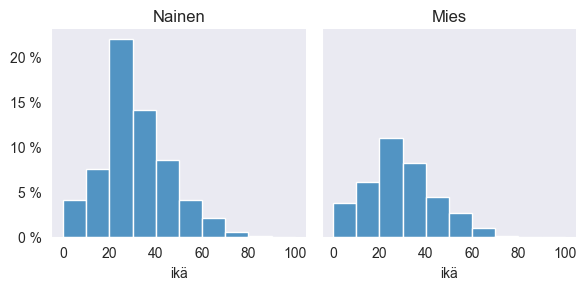

In [673]:
g = sns.displot(data=df_titanic, x='ikä', col='sukupuoli', kind='hist', bins=age_groups, height=3, aspect=1, stat='percent')
g.set_ylabels('')
plt.gca().yaxis.set_major_formatter(ticks)
for ax, title in zip(g.axes.flatten(), gender):
    ax.set_title(title)

Yllättävää kyllä, 20 - 40 vuotiaat naiset edustivat data-aineiston pohjata isoa osaa matkustajista.

## Kunnat

Jatketaan tehtävää tutkimalla Suomen kuntia käsittelevää data-aineistoa.

In [674]:
# Aloitetaan lukemalla Excel-tiedosto
df_municipality = pd.read_excel(data_kunnat)

# Tarkastellaan hieman mitä data aineisto sisältää
df_municipality

,Unnamed: 0,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,6587,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5
305,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,9714,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1
306,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,595,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8
307,Ähtäri,61.9,5484,-0.7,13.4,52.4,34.2,0.1,1.2,-52,...,2029,10.7,25.2,62.5,101.1,586.6,3621.9,9556.5,1544.0,4759.7


In [675]:
# Tarkastellaan vielä hieman tunnuslukuja
df_municipality.describe()

,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021","Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,61.875405,17955.472492,-0.465372,14.753074,55.580259,29.664401,9.430421,3.106796,-26.100324,0.000000,...,7393.737864,10.440453,23.763754,63.682201,85.753074,677.923301,3341.946278,5602.757282,2005.773463,4065.811327
std,22.066455,50084.667410,1.182886,3.889350,4.357919,7.060984,24.392197,3.158197,172.848104,305.371522,...,27126.461941,7.539232,9.990754,10.330891,19.797897,380.002042,1818.144829,2923.164014,338.187718,878.299303
min,0.000000,105.000000,-4.800000,4.000000,46.500000,10.800000,0.000000,0.200000,-587.000000,-4210.000000,...,22.000000,0.100000,2.300000,22.300000,34.600000,-583.300000,0.000000,0.000000,366.300000,1221.900000
25%,47.300000,2673.000000,-1.200000,12.100000,52.300000,25.000000,0.100000,1.400000,-65.000000,-30.000000,...,807.000000,3.800000,17.200000,57.300000,71.500000,502.100000,2037.900000,3587.400000,1783.300000,3463.200000
50%,60.800000,5967.000000,-0.600000,14.400000,55.500000,29.300000,0.300000,2.100000,-31.000000,-5.000000,...,1849.000000,9.500000,22.900000,63.900000,86.800000,664.900000,3287.500000,5400.200000,1964.200000,4010.600000
75%,77.400000,14643.000000,0.200000,16.900000,58.300000,35.100000,0.800000,3.500000,-7.000000,20.000000,...,4648.000000,15.500000,28.800000,70.200000,99.100000,838.000000,4287.900000,7173.600000,2211.300000,4673.800000
max,100.000000,658457.000000,4.000000,30.800000,68.100000,44.600000,92.400000,25.700000,1594.000000,1816.000000,...,398042.000000,33.500000,68.100000,92.600000,160.900000,4897.100000,10897.800000,18154.800000,3088.500000,6778.700000


Tarkastellaan ensiksi oleellisimmat asia. Listaan vaikka top 10 kunta väkiluvun perusteella.

In [676]:
# Napataan 10 suurinta kuntaa väkiluvun perusteella ja tallennetaan se uuteen data-frameen. 
df_municipality.nlargest(10,'Väkiluku, 2021')

,Unnamed: 0,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
33,Helsinki,99.9,658457,0.2,14.3,68.1,17.6,5.6,10.3,1534,...,398042,0.1,10.3,88.3,131.8,1314.3,1510.1,8451.7,2206.2,3396.6
11,Espoo,99.3,297132,1.5,18.4,66.4,15.2,6.7,13.0,1594,...,122603,0.1,16.5,81.6,92.0,1039.7,4236.7,14637.8,2515.2,2866.7
267,Tampere,98.6,244223,1.3,13.1,67.7,19.3,0.5,5.2,114,...,124149,0.2,17.2,81.4,119.8,703.1,3795.4,8936.4,2084.3,3544.2
289,Vantaa,99.7,239206,0.8,16.9,67.4,15.7,2.3,14.3,1181,...,110704,0.2,23.4,75.0,102.5,702.9,3820.4,8292.2,2155.2,3115.6
179,Oulu,96.7,209551,1.1,17.1,66.1,16.9,0.2,3.4,632,...,91589,0.6,19.1,79.3,104.8,465.0,3621.2,5928.8,2078.1,3319.4
275,Turku,99.1,195137,0.4,12.5,66.4,21.1,5.5,7.5,-153,...,98911,0.4,14.6,83.7,122.5,333.9,3666.7,7392.8,1954.9,3654.6
62,Jyväskylä,95.2,144473,0.7,14.9,66.2,19.0,0.2,3.5,213,...,62971,0.6,16.9,81.1,107.4,500.6,2669.7,8552.4,1844.1,3159.0
113,Kuopio,86.5,121543,1.1,14.3,63.6,22.0,0.1,2.9,-120,...,52118,2.6,14.4,81.9,104.1,476.0,3822.5,9714.6,2052.0,3894.8
122,Lahti,97.5,120027,0.0,14.2,60.6,25.2,0.4,4.9,-377,...,48780,0.5,24.3,73.8,106.4,774.2,7281.9,10364.1,1971.8,3485.9
200,Pori,93.7,83482,-0.2,13.7,59.6,26.7,0.6,2.9,-406,...,33086,1.4,19.0,78.3,103.3,385.8,3404.2,6792.6,1779.2,3683.1


Koska koko data-aineistossa löytyy iso määrä muuttujia, niin voitaisiin tutkia hieman näiden korrelaatiota. 

In [677]:
# Koska tällä hetkellä olemme kiinnostuneita määrällisten muuttujien välisestä riippuvuudesta,
# pudotetaan kuntien nimet
df_municipality = df_municipality.loc[:, ~df_municipality.columns.str.contains('Unnamed')]
#df_municipality.drop(['Kunta'], axis=1)
df_municipality.head()

,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021","Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,64,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,-93,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,-27,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,-68,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,27,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3


In [678]:
# Tarkastellaan muuttujien korrelaatiota suhteessa väkilukuun.
df_municipality.corr()['Väkiluku, 2021']

Taajama-aste, %, 2020                                                                     0.402412
Väkiluku, 2021                                                                            1.000000
Väkiluvun muutos edellisestä vuodesta, %, 2021                                            0.221529
Alle 15-vuotiaiden osuus väestöstä, %, 2021                                               0.054646
15-64 -vuotiaiden osuus väestöstä, %, 2021                                                0.497108
Yli 64-vuotiaiden osuus väestöstä, %, 2021                                               -0.336465
Ruotsinkielisten osuus väestöstä, %, 2021                                                -0.062596
Ulkomaan kansalaisten osuus väestöstä, %, 2021                                            0.254370
Syntyneiden enemmyys, henkilöä, 2021                                                      0.655554
Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021                                     -0.466797
Perheiden 

Data-aineistosta löytyi muutama mielenkiintoinen seikka mitä voitaisiin tutkia lisää, Korkea-asteen tutkinnon suorittaneiden sekä Rivi- ja pientaloissa asuvien asuntokuntien osuus suhteessa väestöön. Tehdään molemmista hajontakaavio jotta tämä suhde on helpompi visualisoida.

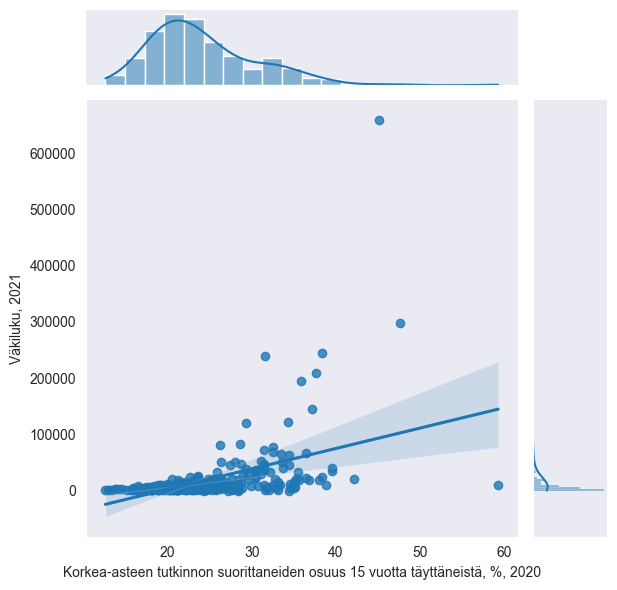

In [679]:
sns.jointplot(data=df_municipality, x='Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020', y='Väkiluku, 2021', kind='reg')

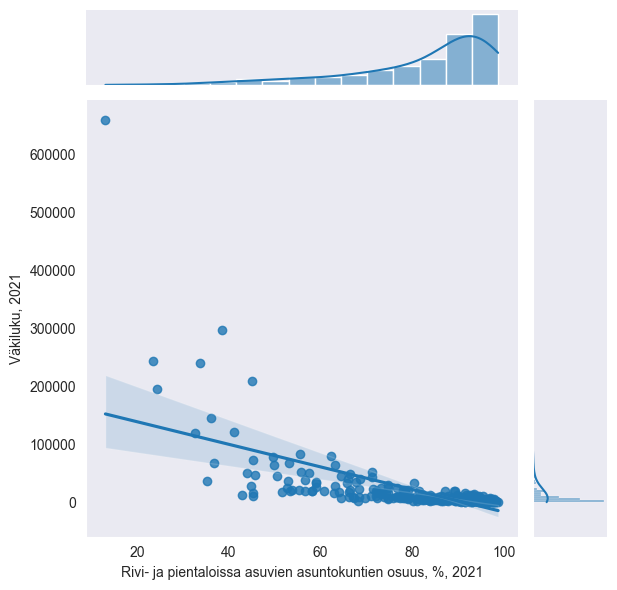

In [680]:
sns.jointplot(data=df_municipality, x='Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2021', y='Väkiluku, 2021', kind='reg')

Voidaan todeta että näiden arvojen välillä on joko positiivinen tai negatiinen korrelaatio suhteessa väkilukuun.


## Sales

Katsotaan viimeiseksi mottoriajoneuvojen myynti ja toimitus-dataa.

In [681]:
# Luetaan data-paketti. Huomioidaan että data on tällä kertaa .csv muodossa. 
# Tiedossa on että paketin merkistökoodaus pitää erikseen määritellä, koskka Python-ohjelmointikieli ei oletuksella sitä tue.
df_sales = pd.read_csv(data_sales, encoding = 'ISO-8859-1')
# Tarastellaan mitä data-paketti sisältää
df_sales


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


Data-paketissa on hyvin aineistoa mutta jos keskittyisimme maakohtaisiin tuloksiin ja näin ollen voisimme poistaa turhia sarakkeita jotta kokonaisuus on hallittavampi.

In [682]:
df_sales.drop(['ORDERLINENUMBER','ORDERDATE','CUSTOMERNAME', 'ADDRESSLINE1', 'PHONE', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME','QTR_ID','MONTH_ID','MSRP', 'PRODUCTCODE'], axis='columns', inplace=True)
df_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,STATUS,YEAR_ID,PRODUCTLINE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,Shipped,2003,Motorcycles,USA,Small
1,10121,34,81.35,2765.90,Shipped,2003,Motorcycles,France,Small
2,10134,41,94.74,3884.34,Shipped,2003,Motorcycles,France,Medium
3,10145,45,83.26,3746.70,Shipped,2003,Motorcycles,USA,Medium
4,10159,49,100.00,5205.27,Shipped,2003,Motorcycles,USA,Medium
...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,Shipped,2004,Ships,Spain,Small
2819,10373,29,100.00,3978.51,Shipped,2005,Ships,Finland,Medium
2820,10386,43,100.00,5417.57,Resolved,2005,Ships,Spain,Medium
2821,10397,34,62.24,2116.16,Shipped,2005,Ships,France,Small


Koska data on suurilta osin Englannin-kielistä, pidetään se sellaisena mutta siistitään hieman sarakkeiden nimiä.

In [683]:
t = df_sales.columns
rename_dic = {}

for x in t:
    s = x
    s = s.lower()
    ts = s[0].upper() + s[1:]
    rename_dic[x] = str(ts)

df_sales.rename(columns = rename_dic, inplace=True)
# Tarkastetaan muutokset
df_sales


,Ordernumber,Quantityordered,Priceeach,Sales,Status,Year_id,Productline,Country,Dealsize
0,10107,30,95.70,2871.00,Shipped,2003,Motorcycles,USA,Small
1,10121,34,81.35,2765.90,Shipped,2003,Motorcycles,France,Small
2,10134,41,94.74,3884.34,Shipped,2003,Motorcycles,France,Medium
3,10145,45,83.26,3746.70,Shipped,2003,Motorcycles,USA,Medium
4,10159,49,100.00,5205.27,Shipped,2003,Motorcycles,USA,Medium
...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,Shipped,2004,Ships,Spain,Small
2819,10373,29,100.00,3978.51,Shipped,2005,Ships,Finland,Medium
2820,10386,43,100.00,5417.57,Resolved,2005,Ships,Spain,Medium
2821,10397,34,62.24,2116.16,Shipped,2005,Ships,France,Small


Päivitetään vielä hieman nimiä


In [686]:
df_sales.rename(columns = {'Ordernumber': 'Order number', 'Quantityordered':'Quantity ordered', 'Priceeach':'Price for each', 'Year_id':'Year', 'Productline':'Product line','Dealsize':'Deal size'}, inplace=True)
df_sales

,Order number,Quantity ordered,Price for each,Sales,Status,Year,Product line,Country,Deal size
0,10107,30,95.70,2871.00,Shipped,2003,Motorcycles,USA,Small
1,10121,34,81.35,2765.90,Shipped,2003,Motorcycles,France,Small
2,10134,41,94.74,3884.34,Shipped,2003,Motorcycles,France,Medium
3,10145,45,83.26,3746.70,Shipped,2003,Motorcycles,USA,Medium
4,10159,49,100.00,5205.27,Shipped,2003,Motorcycles,USA,Medium
...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,Shipped,2004,Ships,Spain,Small
2819,10373,29,100.00,3978.51,Shipped,2005,Ships,Finland,Medium
2820,10386,43,100.00,5417.57,Resolved,2005,Ships,Spain,Medium
2821,10397,34,62.24,2116.16,Shipped,2005,Ships,France,Small


Nyt listan sisälty näkyy paremmin. 
Tarkastetaan myynti vuosien mukaan.

In [687]:
df_sales.pivot_table(values='Sales', index='Year', aggfunc='sum').style.format(precision=0)

,Sales
Year,
2003,3516980
2004,4724163
2005,1791487


Myynnin keskiarvo voisi olla hekä hieman kuvaavampi.

In [618]:
df_sales.pivot_table(values='Sales', index='Year').style.format(precision=0)

,Myynti
Vuosi,
2003,3517
2004,3512
2005,3748


Tarkastellaan seuraavaksi maakohtaista myyntiä tuotelinjan mukaisesti.


In [689]:

df_sales.pivot_table(values='Quantity ordered', index='Country', columns='Product line').style.format(precision=0, na_rep='-').highlight_max(color='lightgreen', axis=0).highlight_min(color='pink', axis=0)

Product line,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Country,,,,,,,
Australia,34,34,33,28,33,35,34
Austria,37,39,33,28,-,41,32
Belgium,37,-,41,31,32,-,32
Canada,33,41,32,35,-,32,32
Denmark,37,-,35,31,34,36,34
Finland,34,34,35,35,44,35,36
France,36,35,36,36,32,36,34
Germany,36,40,31,28,44,40,31
Ireland,34,29,29,-,25,37,28
